# Video Game Engagement Analysis

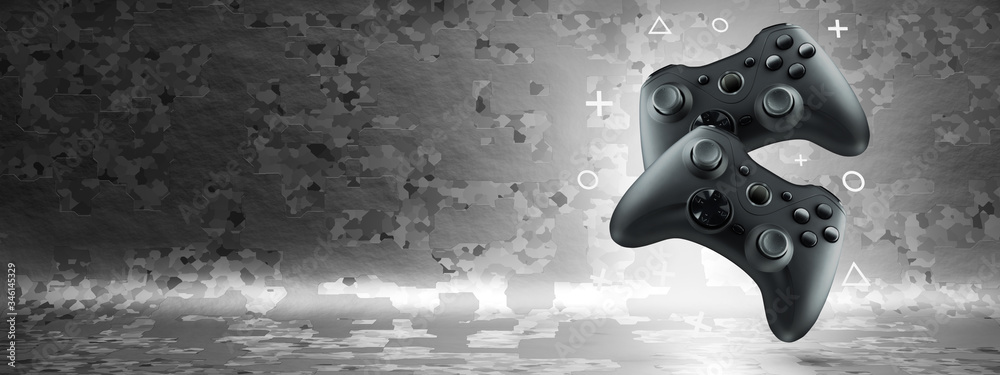

## Overview

The purpose of this project is to provide stakeholders with valuable insights into predictors of high engagement in video game players (gamers).  This project can be used to predict high engagement in video games to make recommendations for video game design and marketing strategies.

## Business Understanding

The stakeholder for this project is a video game producer or marketer.  This project can be used for predictive modeling of video game player engagement patterns which can be used for optimization of game design and marketing strategies.  This can be used to help the business design games to be more engaging.  It can also help the business with targeting marketing towards individuals who are highly engaged in video games. 

## Data Understanding

The data comes from a Kaggle dataset. 

 Rabie El Kharoua. (2024). 🎮 Predict Online Gaming Behavior Dataset [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8742674

Mr. Kharoua owns the data and has made it available under the CC BY 4.0 license allowing anyone to use it as long as proper citation is given to the author.  The target variable is ‘High Engagement Level’.  The predictors available to us are Age, Gender, Location, Game Genre, Playtime, In Game Purchases, Game Difficulty, Sessions Per Week, Player Level, and Achievements Unlocked. The data types are integers, objects, and floats but they are all transformed to floating point numbers for analysis.  The dataset contains 40,034 entries but for this analysis I looked at only low engagement (10,000 entries) and high engagement (10,000 entries).  There is an even distribution of these data so there was no need to use any resampling methods.  The dataset originates from a confidential source and is scheduled to be released in the near future.  Therefore, we do not know how the data was collected or if it is correct. 


In [1]:
#Import Libraries and Data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sm
from sklearn.metrics import classification_report
from scipy import stats
import sklearn.preprocessing as preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, f1_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn import svm
from scipy.stats import randint
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn import svm


gb = pd.read_csv('online_gaming_behavior_dataset.csv')

### Inspect the Contents of the dataframe

In [2]:
#Inspect the top 5 rows
gb.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [3]:
#Inspect the number of entries and features
gb.shape

(40034, 13)

When I inspected the data I found that it was a very clean dataset.  There are not any non-null values for any of the features, there aren't any duplicate or missing entries, and all of the data types are what I would expect them to be.  

In [4]:
#Inspect the number of non-null entries and data types
gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

When I inspected the values for the categorical data I noticed that there is an even distribution of the game genres.  There is a relative even distribution of male and female gamers (60%-40% respectively). Most of the entries are from the united states with relatively large numbers from Europe and Asia. Most of the entries are from easy games.  For the target variable there are 19k medium entries, 10k low, and 10k high entries.  I'm going to remove the medium entries so that there is an even distribution for the target variable of high engagement vs. low engagement. 

In [5]:
#check the value counts for categorical data
categoricals = gb.select_dtypes("object")

for col in categoricals: 
    print(gb[col].value_counts(), "\n")

Male      23959
Female    16075
Name: Gender, dtype: int64 

USA       16000
Europe    12004
Asia       8095
Other      3935
Name: Location, dtype: int64 

Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: GameGenre, dtype: int64 

Easy      20015
Medium    12011
Hard       8008
Name: GameDifficulty, dtype: int64 

Medium    19374
High      10336
Low       10324
Name: EngagementLevel, dtype: int64 



For the quantitative data I can see the descriptive statistics for each variable. 
<br> 

- The average age of the entries is 32 years old with a range of 15 to 49. 
- The average entry plays 9 sessions per week with a range of 0 to 19. 
- The average duration of each session is 95 minutes with a range of 10 to 179. 


In [6]:
#Inspect Descriptive Statistics for Variables
numericals = gb.select_dtypes("int64", "float64")

for col in numericals: 
    print(gb[col].describe(), "\n")

count    40034.000000
mean     29016.500000
std      11556.964675
min       9000.000000
25%      19008.250000
50%      29016.500000
75%      39024.750000
max      49033.000000
Name: PlayerID, dtype: float64 

count    40034.000000
mean        31.992531
std         10.043227
min         15.000000
25%         23.000000
50%         32.000000
75%         41.000000
max         49.000000
Name: Age, dtype: float64 

count    40034.000000
mean         0.200854
std          0.400644
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: InGamePurchases, dtype: float64 

count    40034.000000
mean         9.471774
std          5.763667
min          0.000000
25%          4.000000
50%          9.000000
75%         14.000000
max         19.000000
Name: SessionsPerWeek, dtype: float64 

count    40034.000000
mean        94.792252
std         49.011375
min         10.000000
25%         52.000000
50%         95.000000
75%        137.000000
m

In [7]:
#There are no missing values in the dataset
gb.isna().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

## Data Preparation

I prepared the data for modeling by converting all data into floating numbers, normalizing the numeric data so that it was all on the scale of 0 to 1, and by converting categorical data to numeric format through one-hot encoding.  This model is a binary categorical problem so to make the model I'm going to keep only high and low level engagement gamers because they have a similar number of entries. I dropped features as references features based on the feature that had the highest value count or was the median value.  I dropped the PlayerID feature because it was just an index column that didn't provide any insights into this analysis. I made a heat map to check to see if any of the predictors were correlated to each other so that there was no multicollinearity.  Finally, I created my predictor and target variables for modeling and created a function for making my confusion matrices. 

In [8]:
#Drop all of the medium engagement entries
gb = gb[(gb['EngagementLevel']=='High')|(gb['EngagementLevel']=='Low')]

In [9]:
#Get dummy variables for categorical features
gb = pd.get_dummies(gb, dtype = float)

In [10]:
#drop features to avoid multicollinearity 
gb = gb.drop(['PlayerID', 'PlayTimeHours', 'Gender_Male', 'Location_USA', 'GameGenre_Strategy', 'GameDifficulty_Easy', 'EngagementLevel_Low'], axis=1)

In [11]:
#Data Ready for Modeling
gb.head()

,Age,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender_Female,Location_Asia,Location_Europe,Location_Other,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameDifficulty_Hard,GameDifficulty_Medium,EngagementLevel_High
2,22,0,16,142,35,41,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,37,0,2,81,74,22,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,25,0,1,50,13,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,38,0,13,95,99,36,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10,17,0,8,95,14,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [12]:
#Check value counts for my target variable
gb['EngagementLevel_High'].value_counts()

1.0    10336
0.0    10324
Name: EngagementLevel_High, dtype: int64

I created a heat map of the predictors because I want to check and see if any of the variables are correlated to each other.  If the variables are correlated to each other then this will lead to multicolliniarity and cause my model to be unreliable because one of these variables could perfectly predict another. 

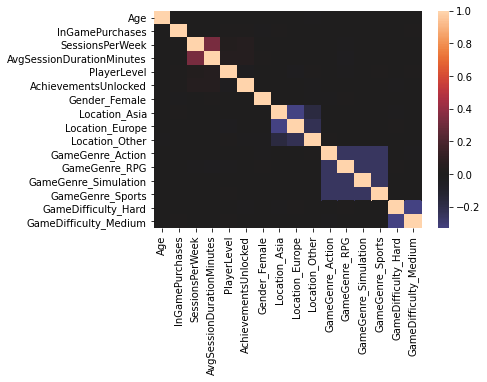

In [13]:
#create a heat map of the predictors
predictors = gb.drop(['EngagementLevel_High'], axis=1)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(predictors.corr(), center=0);

In [14]:
#Create the predictor and target variables
X = gb.drop(columns=['EngagementLevel_High'], axis=1)
y = gb['EngagementLevel_High']

This function came from a GitHub [repository](https://github.com/learn-co-curriculum/dsc-visualizing-confusion-matrices-lab/blob/solution/index.ipynb) with my coursework at Flatiron School. 

In [15]:
#create a function for making confusion matrices

def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm


## Modeling

This is a classification task.  The models I used are logistic regression, random forest, and support vector machines. 
<br> 

Logistic regression models are used as classifiers to determine the likelihood of a given data point being associated with one of two categories. (High Engagement gamer vs. Low Engagement gamer)
<br> 

Random forest models combine output of multiple decision trees to predict an outcome. 
<br> 

Support vector machines(SVM) performs classification by representing data through pairwise similarity comparistons between the original data and data transformed by a kernal function. 
<br> 

After I determined which model was best for my metric of choice (recall), I tuned the hyperparameters of that model in order to produce a model with the best performance. 

#### Model Iteration 1 - Logist Regression Model using `statsmods`; no normalization, validation, or regularization

Here I made a logistic regression model using the statsmodels library.  I looked at which features were significant.  Then I made a new model without the significant features and found that there was no change to the Pseudo R-square between the two models.

##### Fit

In [16]:
#Build a logistic regression model
X = sm.tools.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.226555
         Iterations 8


##### Evaluate

In [17]:
#View Results of Logistic Regression Model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     EngagementLevel_High   No. Observations:                20660
Model:                            Logit   Df Residuals:                    20643
Method:                             MLE   Df Model:                           16
Date:                  Mon, 12 Aug 2024   Pseudo R-squ.:                  0.6732
Time:                          10:18:23   Log-Likelihood:                -4680.6
converged:                         True   LL-Null:                       -14320.
Covariance Type:              nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -7.5016      0.164    -45.617      0.000      -7.824      -7.179
Age                          -0.0006      0.003     -0.202      0.840      -0.006       0.005
InGamePurchases               0.0920      0.068      1.346      0.178      -0.042       0.226
SessionsPerWeek               0.3588      0.005     72.165      0.000       0.349       0.369
AvgSessionDurationMinutes     0.0335      0.001     58.003      0.000       0.032       0.035
PlayerLevel                   0.0070      0.001      7.194      0.000       0.005       0.009
AchievementsUnlocked          0.0126      0.002      6.523      0.000       0.009       0.016
Gender_Female                 0.0330      0.056      0.586      0.558      -0.077       0.143
Location_Asia                 0.0166      0.075      0.220      0.826      -0.131       0.165
Location_Europe              -0.0953      0.067     -1.431      0.153      -0.226       0.035
Location_Other               -0.0282      0.098     -0.288      0.773      -0.220       0.163
GameGenre_Action              0.0433      0.087      0.498      0.619      -0.127       0.214
GameGenre_RPG                 0.0404      0.088      0.460      0.646      -0.132       0.212
GameGenre_Simulation          0.1034      0.087      1.186      0.236      -0.067       0.274
GameGenre_Sports             -0.0320      0.087     -0.369      0.712      -0.202       0.138
GameDifficulty_Hard           0.0874      0.073      1.205      0.228      -0.055       0.230
GameDifficulty_Medium         0.0294      0.064      0.460      0.646      -0.096       0.154
=============================================================================================
"""

##### Interpret

This model shows that, based on the P-values, `SessionsPerWeek`, `AvgSessionDurationMinutes`, `PlayerLevel`, and `AchievementsUnlocked` are significant features towards predicting high engagement level in online video game players using an alpha value of .05.  The model also accounts for 67% of the variance based on the Pseudo R-squared value. 

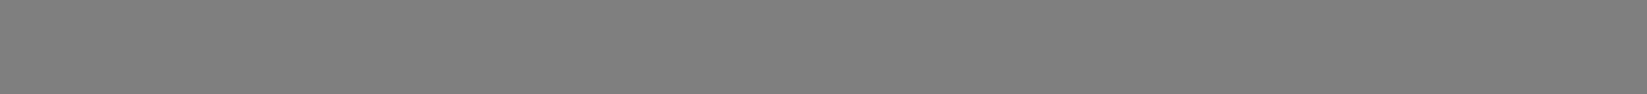

#### Model Iteration 2 - Logistic Regression Model with only Significant Predictors

##### Fit

In [18]:
significant_only = ['SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked', 'EngagementLevel_High']
gb_significant_only = (gb[significant_only])

y_sig = gb_significant_only['EngagementLevel_High']
X_sig = gb_significant_only.drop(columns='EngagementLevel_High', axis=1)

X_sig = sm.tools.add_constant(X_sig)
logit_model_sig = sm.Logit(y_sig, X_sig)
result_sig = logit_model_sig.fit()



Optimization terminated successfully.
         Current function value: 0.226773
         Iterations 8


##### Evaluate

In [19]:
result_sig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     EngagementLevel_High   No. Observations:                20660
Model:                            Logit   Df Residuals:                    20655
Method:                             MLE   Df Model:                            4
Date:                  Mon, 12 Aug 2024   Pseudo R-squ.:                  0.6728
Time:                          10:18:24   Log-Likelihood:                -4685.1
converged:                         True   LL-Null:                       -14320.
Covariance Type:              nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -7.4540      0.116    -64.055      0.000      -7.682      -7.226
SessionsPerWeek               0.3585      0.005     72.228      0.000       0.349       0.368
AvgSessionDurationMinutes     0.0334      0.001     58.022      0.000       0.032       0.035
PlayerLevel                   0.0070      0.001      7.218      0.000       0.005       0.009
AchievementsUnlocked          0.0127      0.002      6.564      0.000       0.009       0.016
=============================================================================================
"""

##### Interpret

For this model I ran the same logistic regression model as model 1 except I only included the significant features.  This lowered the Pseudo R-squared by .0004 and shows that removing the insignificant features had little impact. 

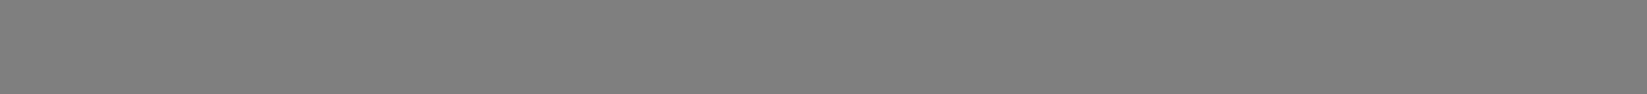

### Train-Test-Split and Normalization

For the remainder of the models I split the data into training and test data.  I did this before normalizing the data in order to prevent data leaking.  

In [20]:
#Split the data again into targets and predictors because the varable was changed for the statsmodels models
X = gb.drop(columns=['EngagementLevel_High'], axis=1)
y = gb['EngagementLevel_High']

In [21]:
#First I split the data into training and test sets before I normalize to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [22]:
#Normalize the data after the split on a scale from 0 to 1 since this is a binary classification problem

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train),
    # index is important to ensure we can concatenate with other columns
    index=X_train.index,
    columns=X_train.columns
)

In [23]:
#Normalize the Test Data
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    index=X_test.index,
    columns=X_test.columns
)

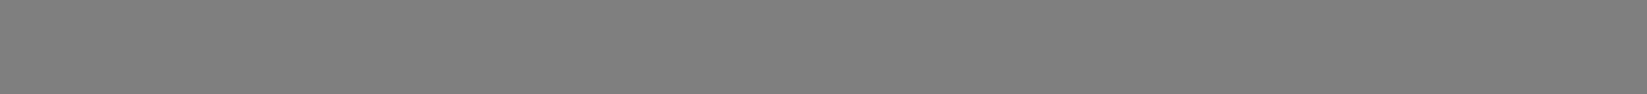

#### Model Iteration 3 - Logistic Regression; normalized variables, train-test split, regularization

##### Fit

In [24]:
#fit a logistic regression model to the training data
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_scaled, y_train)
model_log


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

##### Evaluate

For this analysis the primary evaluation metric that I will be using is recall.  This is a measure of the false negative rate.  A false negative would lead to a stakeholder not targeting a high engagement gamer when they really are one.  This would be more costly to the stakeholder than targeting a low engagement gamer that they think is a high engagement gamer.  

I provide the other evaluation metrics as tie-breakers with the primary focus being recall. 

In [25]:
y_hat_train = logreg.predict(X_train_scaled)
y_hat_test = logreg.predict(X_test_scaled)

In [26]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87      2557
         1.0       0.85      0.91      0.88      2608

    accuracy                           0.88      5165
   macro avg       0.88      0.88      0.88      5165
weighted avg       0.88      0.88      0.88      5165



In [27]:
# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[2139  418]
 [ 225 2383]]


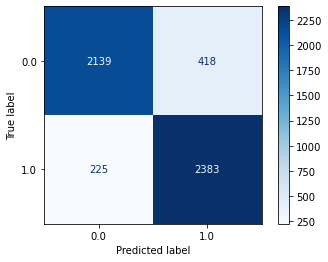

In [28]:
# Visualize your confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=model_log.classes_)
disp.plot(cmap=plt.cm.Blues)

For calculating the area under the curve (AUC) and drawing my receiver operating characteristics (ROC) curve's I used code from a GitHub [repository](https://github.com/learn-co-curriculum/dsc-roc-curves-and-auc-lab/blob/solution/index.ipynb) included in my coursework at Flatiron School. 

Train AUC: 0.8797299322184078
Test AUC: 0.8751270870772162


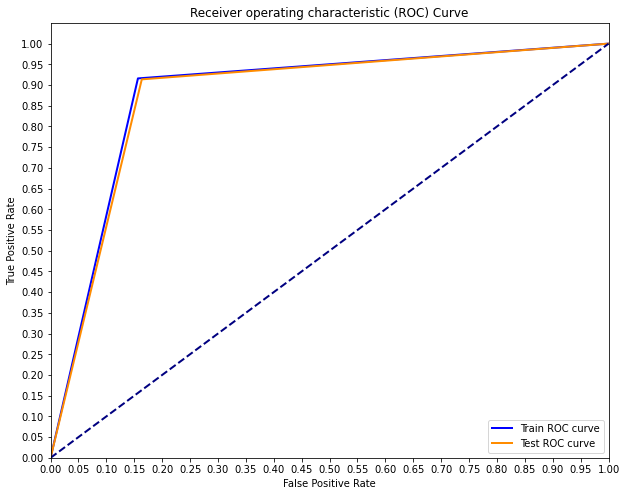

In [29]:
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_hat_train)
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_hat_test)

print('Train AUC: {}'.format(metrics.auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(metrics.auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##### Interpret

This is my baseline logistic regression model with no intercept.  The evaluation metrics are printed along with a confusion matrix to show the number of true positives, false positives, false negatives, and true negatives.  There is also a ROC curve and AUC values that show the model was overfitted or underfitted. 

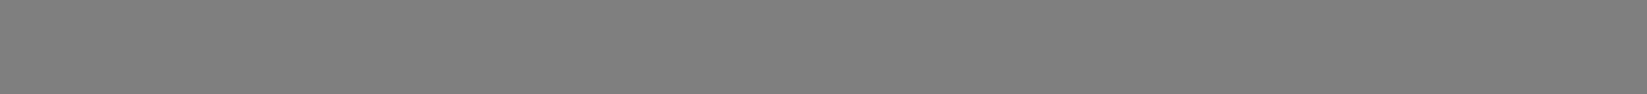

#### Model Iteration 4 - Add an Intercept

##### Fit

In [30]:
#fit a logistic regression model to the training data
logreg_intercept = LogisticRegression(fit_intercept=True, C=1e12, solver='liblinear')
model_log_intercept = logreg_intercept.fit(X_train_scaled, y_train)
model_log_intercept

LogisticRegression(C=1000000000000.0, solver='liblinear')

##### Evaluate

In [31]:
y_hat_train_intercept = logreg_intercept.predict(X_train_scaled)
y_hat_test_intercept = logreg_intercept.predict(X_test_scaled)

In [32]:
print(classification_report(y_test, y_hat_test_intercept))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      2557
         1.0       0.93      0.93      0.93      2608

    accuracy                           0.93      5165
   macro avg       0.93      0.93      0.93      5165
weighted avg       0.93      0.93      0.93      5165



In [33]:
conf_matrix(y_test, y_hat_test_intercept)

{'TP': 2429, 'TN': 2386, 'FP': 171, 'FN': 179}

In [34]:
cnf_matrix_intercept = confusion_matrix(y_test, y_hat_test_intercept)
print('Confusion Matrix:\n', cnf_matrix_intercept)

Confusion Matrix:
 [[2386  171]
 [ 179 2429]]


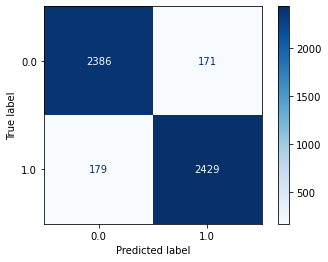

In [35]:
# Visualize your confusion matrix
disp_intercept = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_intercept, display_labels=model_log.classes_)
disp_intercept.plot(cmap=plt.cm.Blues)

Train AUC: 0.9335258733197547
Test AUC: 0.9322448931238919


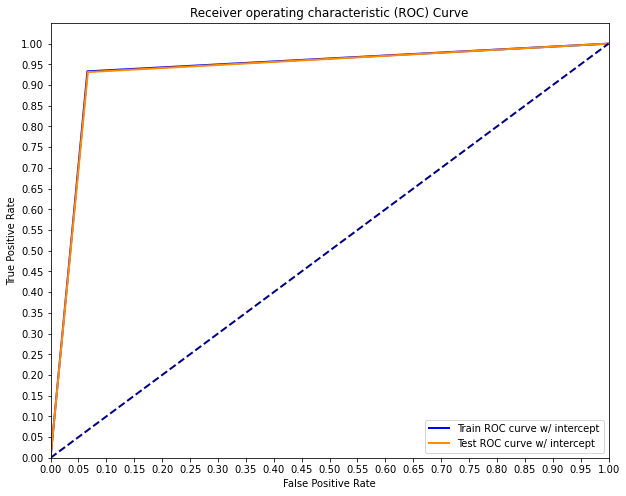

In [36]:
train_fpr_intercept, train_tpr_intercept, train_thresholds_intercept = metrics.roc_curve(y_train, y_hat_train_intercept)
test_fpr_intercept, test_tpr_intercept, test_thresholds_intercept = metrics.roc_curve(y_test, y_hat_test_intercept)

print('Train AUC: {}'.format(metrics.auc(train_fpr_intercept, train_tpr_intercept)))
print('Test AUC: {}'.format(metrics.auc(test_fpr_intercept, test_tpr_intercept)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr_intercept, train_tpr_intercept, color='blue',
         lw=lw, label='Train ROC curve w/ intercept')
plt.plot(test_fpr_intercept, test_tpr_intercept, color='darkorange',
         lw=lw, label='Test ROC curve w/ intercept')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##### Interpret

This changes the parameter of the model to have `fit_intercept = True`.  This model reduced the number of false negatives which improved the recall score from .91 to .93.  The AUC improved from .88 to .93 and teh ROC curve fits the true postive rate better than the model without an intercept as well. 

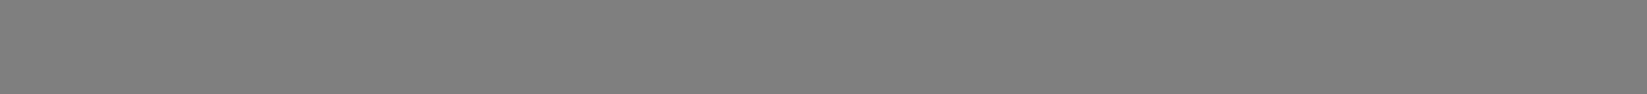

#### Model Iteration 5 - Altering Regularization parameter

Altering Regularization Parameter
Source: [github](https://github.com/learn-co-curriculum/dsc-logistic-regression-model-comparisons-lab/blob/solution/index.ipynb)

##### Fit and Evaluate

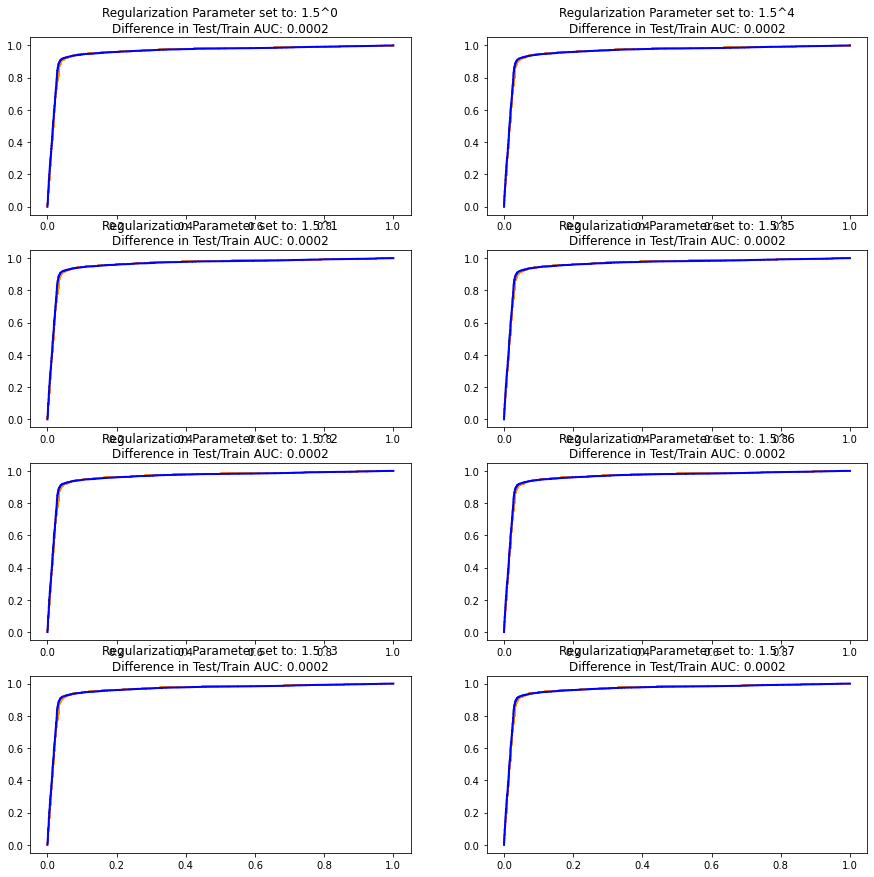

In [37]:
fig, axes = plt.subplots(4,2, figsize=(15, 15))
for n in range(8):
    i = n%4
    j = n//4
    ax = axes[i, j]
    # Fit a model
    logreg = LogisticRegression(fit_intercept=True, C=1.5**(n), solver='liblinear')
    logreg.fit(X_train, y_train)
    
    y_test_score = logreg.decision_function(X_test)
    y_train_score = logreg.decision_function(X_train)

    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_score)
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_score)
    
    test_auc = metrics.auc(test_fpr, test_tpr)
    train_auc = metrics.auc(train_fpr, train_tpr)
    auc_diff = round(train_auc - test_auc, 4)

#     print('Test AUC with C=1.5^{}: {}'.format(n*2, auc(test_fpr, test_tpr)))
#     print('Train AUCwith C=1.5^{}: {}'.format(n*2, auc(train_fpr, train_tpr)))
    # Add the plot
    ax.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')
    ax.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='Train ROC curve')
    
    ax.set_title('Regularization Parameter set to: 1.5^{}\nDifference in Test/Train AUC: {}'.format(n, auc_diff))

##### Interpret

In this model I showed what happens when you increase the regularization of model 4.  I show the difference in the AUC and the ROC graphs based on increases the `C` parameter.  Increasing the `C` parameter did not impact the model. 

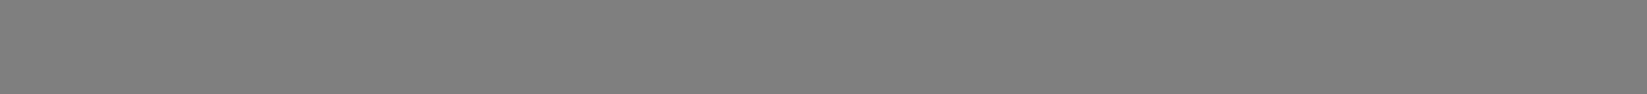

#### Model Iteration 6 - Random Forest Model

For information on random forest models, which I didn't learn about in my coursework at Flatiron School, I looked up random forest models using a Google search engine and studied the top two results: [Geeks For Geeks](https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/) and the scikit learn [documentation](https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/)


##### Fit

In [38]:
rf = RandomForestClassifier()
model_rf = rf.fit(X_train_scaled, y_train)
model_rf

RandomForestClassifier()

In [39]:
y_pred_rf = rf.predict(X_test_scaled)

##### Evaluate

In [40]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      2557
         1.0       0.94      0.93      0.93      2608

    accuracy                           0.93      5165
   macro avg       0.94      0.94      0.93      5165
weighted avg       0.94      0.93      0.93      5165



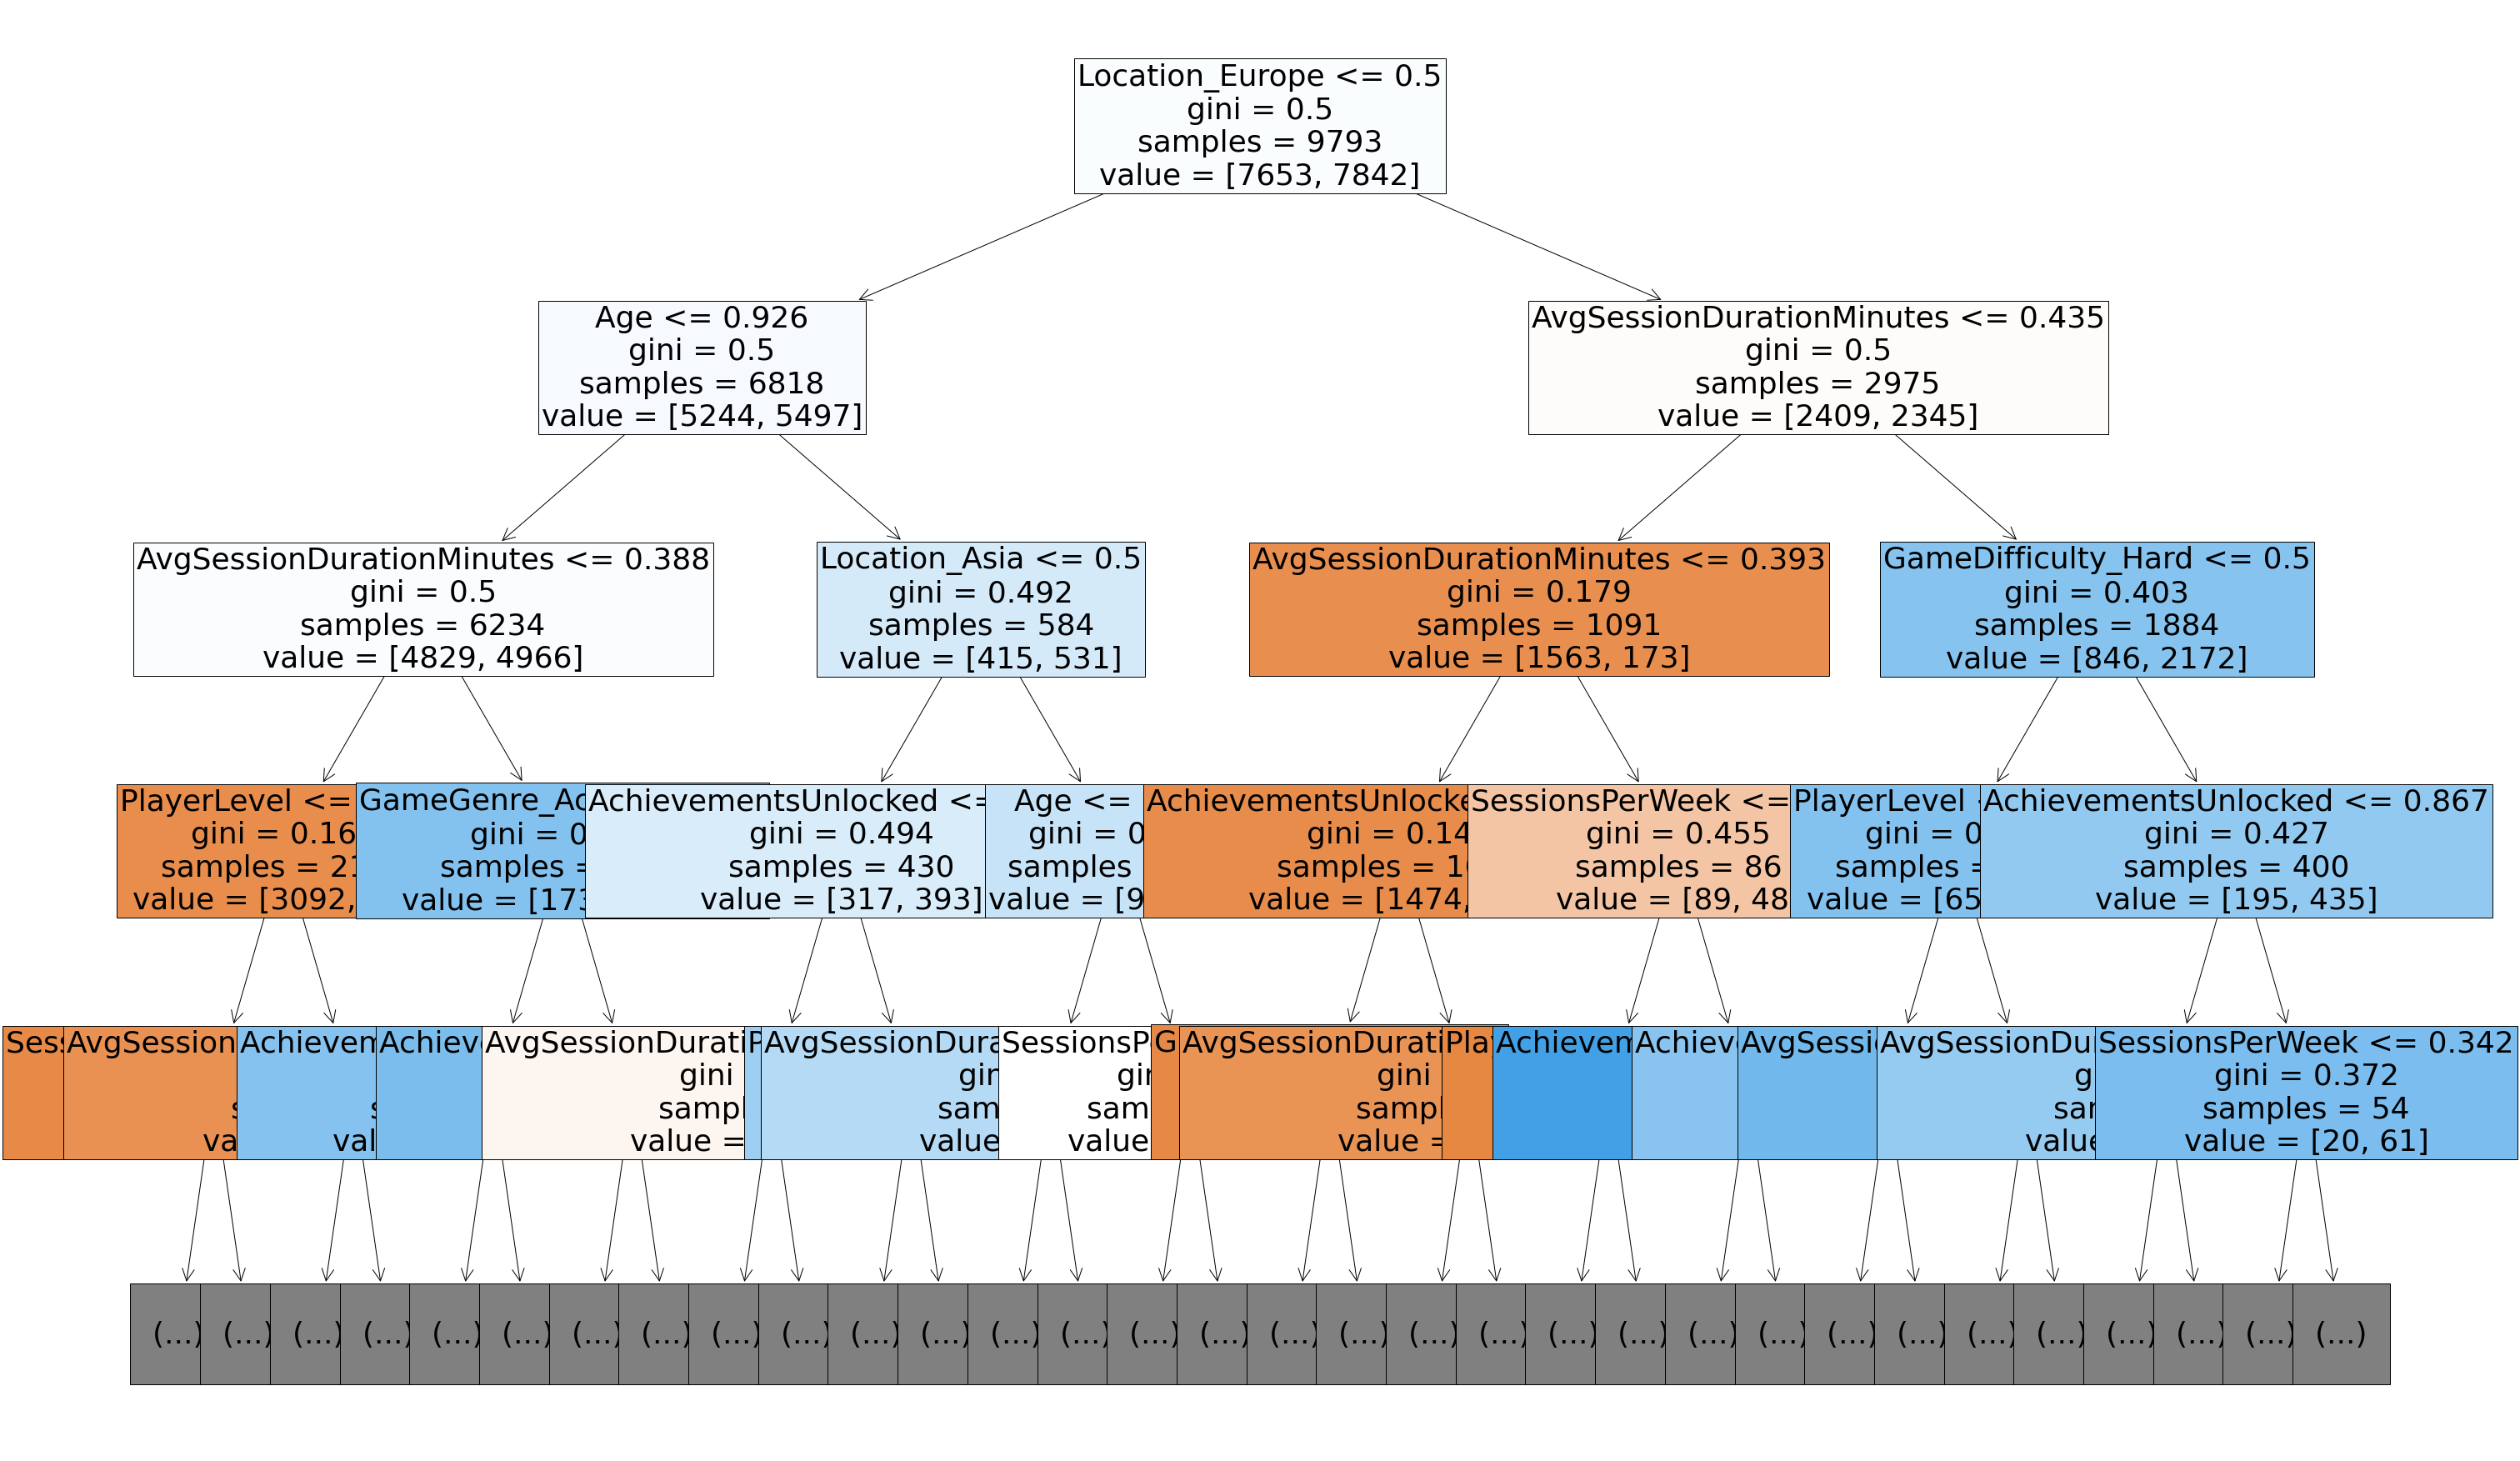

In [41]:
individual_tree = rf.estimators_[0]

plt.figure(figsize=(48,32))
plot_tree(individual_tree, max_depth=4, feature_names = X.columns, filled=True, fontsize=36)
plt.show()

In [42]:
conf_matrix(y_test, y_pred_rf)

{'TP': 2415, 'TN': 2414, 'FP': 143, 'FN': 193}

In [43]:
cnf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:\n', cnf_matrix_rf)

Confusion Matrix:
 [[2414  143]
 [ 193 2415]]


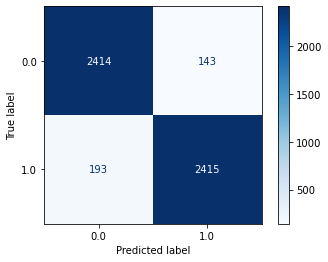

In [44]:
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_rf, display_labels=model_log.classes_)
disp_rf.plot(cmap=plt.cm.Blues)

##### Interpret

This is a random forest model that uses decision trees to make predictions.  It has the same evaluation metrics as model 4 except it has increased precision from .93 to .94. 

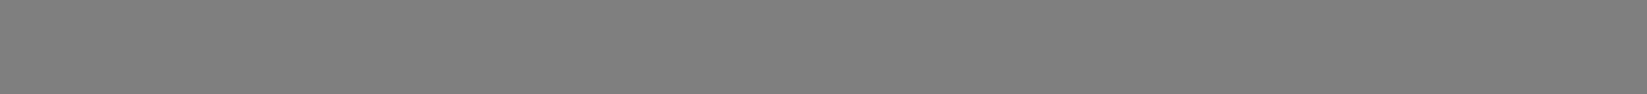

#### Model Iteration 7 - Random Forest + Hyperparameter Tuning

##### Fit

In [45]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000235296F4C70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000235296F4610>})

In [46]:
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 223}


In [48]:
rf_best_params = RandomForestClassifier(max_depth=8, n_estimators=223)
rf_best_params.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=8, n_estimators=223)

In [49]:
y_pred_best_params = rf_best_params.predict(X_test_scaled)

##### Evaluate

In [50]:
print(classification_report(y_test, y_pred_best_params))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      2557
         1.0       0.94      0.93      0.93      2608

    accuracy                           0.93      5165
   macro avg       0.93      0.93      0.93      5165
weighted avg       0.93      0.93      0.93      5165



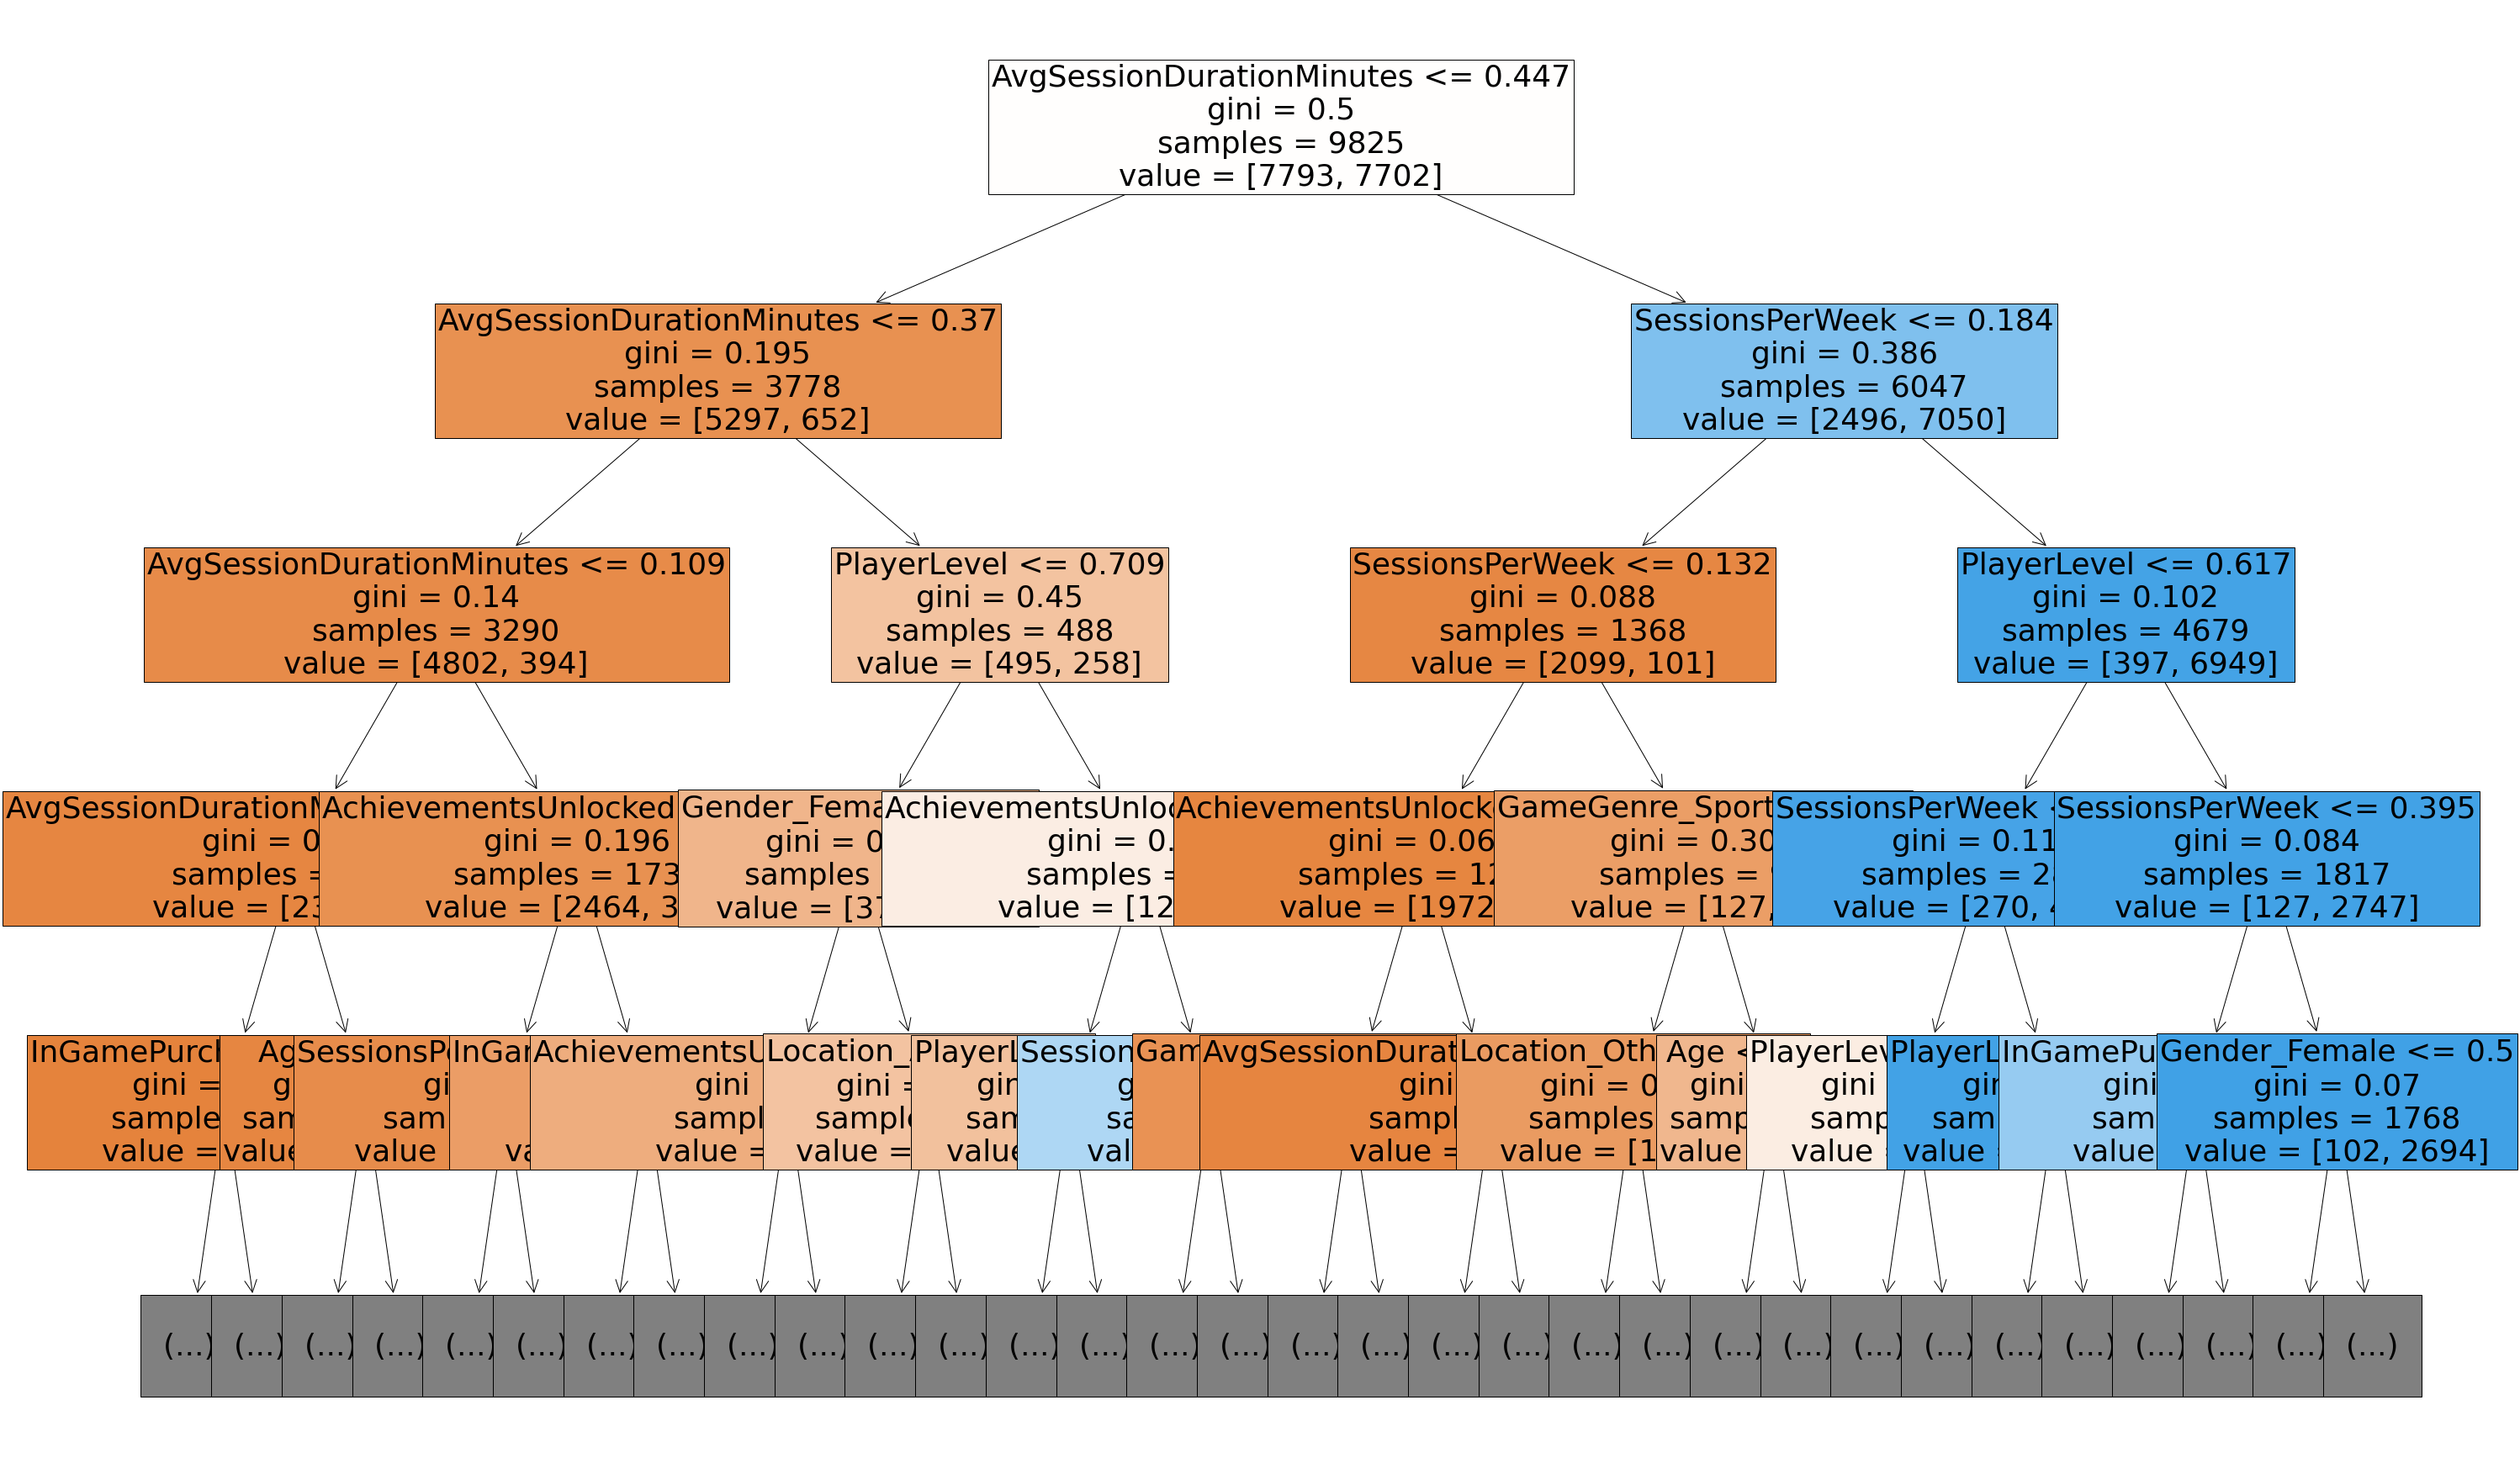

In [51]:
individual_tree_best_params = rf_best_params.estimators_[0]

plt.figure(figsize=(48,32))
plot_tree(individual_tree_best_params, max_depth=4, feature_names = X.columns, filled=True, fontsize=36)
plt.show()

In [52]:
conf_matrix(y_test, y_pred_best_params)

{'TP': 2414, 'TN': 2412, 'FP': 145, 'FN': 194}

In [53]:
cnf_matrix_best_params = confusion_matrix(y_test, y_pred_best_params)
print('Confusion Matrix:\n', cnf_matrix_best_params)

Confusion Matrix:
 [[2412  145]
 [ 194 2414]]


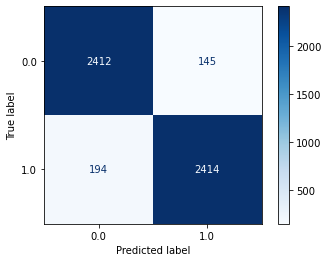

In [54]:
# Visualize your confusion matrix
disp_rf_best_params = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_best_params, display_labels=model_log.classes_)
disp_rf_best_params.plot(cmap=plt.cm.Blues)

##### Interpret

For this model I used RandomSearchCV to figure out what the best parameters are for the random forest model.  I then applied those parameters to the model when I fitted it to the training data. This model improved the accuracy and f-1 score from the original random forest model from .93 to .94 and did not impact the precision or recall. 

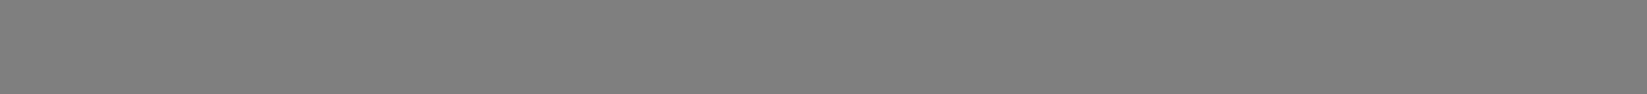

#### Model Iteration 8 - SVM Model

For information on svm models, which I didn't learn about in my coursework at Flatiron School, I looked up svm models using a Google search engine and studied the top two results: [Geeks For Geeks](https://www.geeksforgeeks.org/support-vector-machine-algorithm/) and the scikit learn [documentation](https://scikit-learn.org/stable/modules/svm.html)

##### Fit

In [55]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = clf.predict(X_test)

##### Evaluate

In [56]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      2557
         1.0       0.94      0.93      0.93      2608

    accuracy                           0.93      5165
   macro avg       0.93      0.93      0.93      5165
weighted avg       0.93      0.93      0.93      5165



In [57]:
conf_matrix(y_test, y_pred_svm)

{'TP': 2425, 'TN': 2389, 'FP': 168, 'FN': 183}

In [58]:
cnf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix:\n', cnf_matrix_svm)

Confusion Matrix:
 [[2389  168]
 [ 183 2425]]


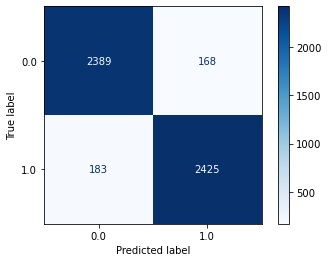

In [59]:
# Visualize your confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_svm, display_labels=model_log.classes_)
disp_svm.plot(cmap=plt.cm.Blues)

##### Interpret

For this model I created a SVM classifier to fit to the training data.  This model has the same evaluation metrics as the random forest model that didn't have parameters changed. 

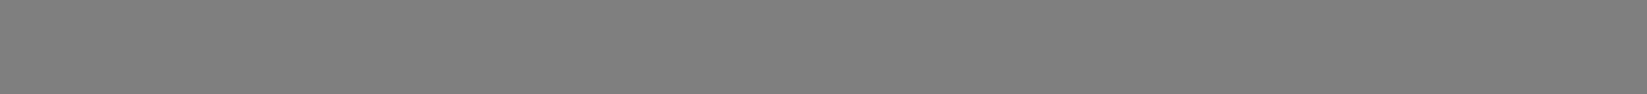

#### Model Iteration 9 - SVM with Polynomial Kernal

##### Fit

In [60]:
#Create a svm Classifier
clf_polynomial = svm.SVC(kernel='poly') # Polynomial Kernel

#Train the model using the training sets
clf_polynomial.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_polynomial = clf_polynomial.predict(X_test)

##### Evaluate

In [61]:
print(classification_report(y_test, y_pred_polynomial))

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      2557
         1.0       0.95      0.92      0.93      2608

    accuracy                           0.93      5165
   macro avg       0.94      0.94      0.93      5165
weighted avg       0.94      0.93      0.93      5165



In [62]:
conf_matrix(y_test, y_pred_polynomial)

{'TP': 2410, 'TN': 2419, 'FP': 138, 'FN': 198}

In [63]:
cnf_matrix_polynomial = confusion_matrix(y_test, y_pred_polynomial)
print('Confusion Matrix:\n', cnf_matrix_polynomial)

Confusion Matrix:
 [[2419  138]
 [ 198 2410]]


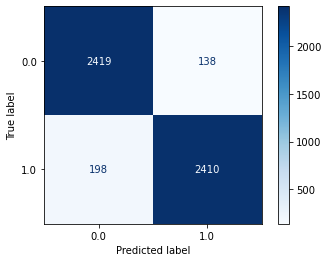

In [64]:
# Visualize your confusion matrix
disp_svm_polynomial = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_polynomial, display_labels=model_log.classes_)
disp_svm_polynomial.plot(cmap=plt.cm.Blues)

##### Interpret

For this model I changed the kernal type of the baseline svm model to polynomial.  This improved the precision by .01 but decreased the recall by .01.  Since recall is my primary evaluation metric this makes this a worse model than the linear svm model. 

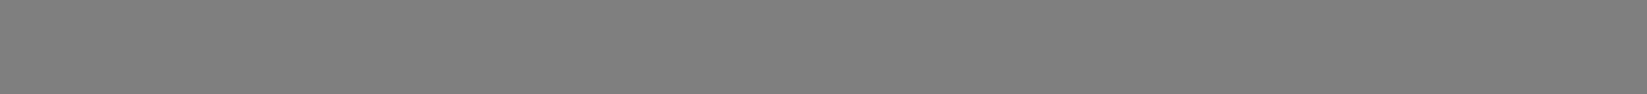

#### Model Iteration 10 - SVM with an RBF Kernal

##### Fit

In [65]:
#Create a svm Classifier
clf_rbf = svm.SVC(kernel='rbf') # RBF Kernel

#Train the model using the training sets
clf_rbf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_rbf = clf_rbf.predict(X_test)

##### Evaluate

In [66]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      2557
         1.0       0.94      0.93      0.93      2608

    accuracy                           0.93      5165
   macro avg       0.93      0.93      0.93      5165
weighted avg       0.93      0.93      0.93      5165



In [67]:
conf_matrix(y_test, y_pred_rbf)

{'TP': 2420, 'TN': 2407, 'FP': 150, 'FN': 188}

In [68]:
cnf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
print('Confusion Matrix:\n', cnf_matrix_rbf)

Confusion Matrix:
 [[2407  150]
 [ 188 2420]]


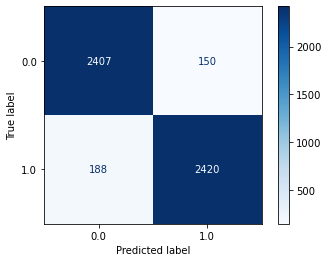

In [69]:
# Visualize your confusion matrix
disp_svm_rbf = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_rbf, display_labels=model_log.classes_)
disp_svm_rbf.plot(cmap=plt.cm.Blues)

##### Interpret

For this model I changed the kernal type to RBF and it gave the same results as the baseline svm model. 

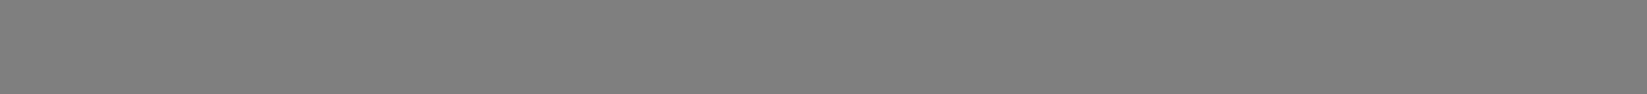

#### Model Iteration 11 - SVM with Increased Regularization

Limitation: I tried to change the C parameter to 100 and ran it for an hour and fifteen minutes before it fit the model and it didn't change the results. Therefore, I'm going to remove this from the program so that if someone wants to run it it won't take that long.  I also ran C=10 and it took quite some time too and didn't make a difference with the metrics so I'm going to keep it at default. 

## Determining Best Model

To determine the best model I compared the evaluation metrics with recall being the primary metric. 

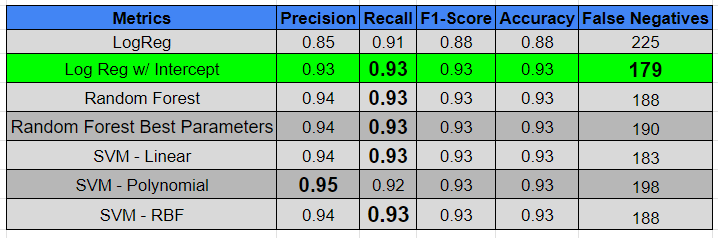

The SVM polynomial model had the highest precision score but it had a lower recall score which is my primary evaluation metric.

5 of the 7 metrics had a recall score of .93 so I had to look for a tie breaker.  Of the 5 models with a recall score of .93 they all had the same accuracy and all of them had the same precision except for the logistic regression model with an interecept which has a precision score of .93. Since recall is the primary metric I'm using to evaluate my models instead of going with one of the other models with a higher precision score I chose to choose the model with the least number of false negatives as my highest peforming model.  

This is the logistc regression model with an intercept. 



## Best Model

### Logistic Regression with an Intercept

The model I chose as the best model is the logistic regression model with an intercept.  This model produced the least amount of false negatives.  Recall is the most important metric for my stakeholders because it limits false negatives which would have a higher cost to my stakeholders.  False negatives would have a higher cost to my stakeholders because a classifying a positie example as a negative example would that my stakeholders missed out on an opportunity to design a game or advertise to a high engagement gamer.  

The training and testing AUC numbers being close to each other shows that the model was not overfit.  The ROC curve hugging the left side of the graph also indicates that model has a higher true positive rate than a false positive rate. 

The features that are most important to predicting high engagement gamers with my model were `Sessions Per Week`, `Avg Session Duration`, `Player Level`, and `Achievements Unlocked`. 

In [70]:
print(classification_report(y_test, y_hat_test_intercept))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      2557
         1.0       0.93      0.93      0.93      2608

    accuracy                           0.93      5165
   macro avg       0.93      0.93      0.93      5165
weighted avg       0.93      0.93      0.93      5165



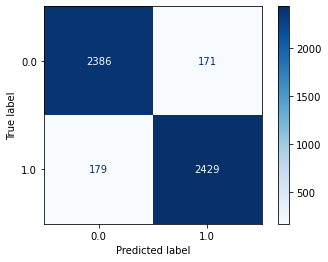

In [71]:
# Visualize your confusion matrix
disp_intercept = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_intercept, display_labels=model_log.classes_)
disp_intercept.plot(cmap=plt.cm.Blues)

Train AUC: 0.9335258733197547
Test AUC: 0.9322448931238919


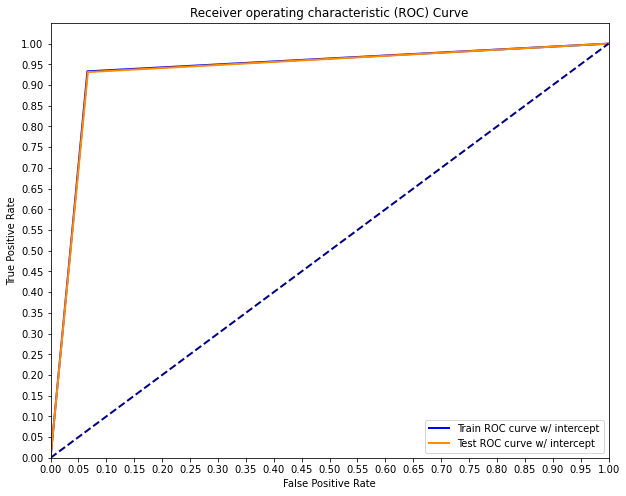

In [72]:
train_fpr_intercept, train_tpr_intercept, train_thresholds_intercept = metrics.roc_curve(y_train, y_hat_train_intercept)
test_fpr_intercept, test_tpr_intercept, test_thresholds_intercept = metrics.roc_curve(y_test, y_hat_test_intercept)

print('Train AUC: {}'.format(metrics.auc(train_fpr_intercept, train_tpr_intercept)))
print('Test AUC: {}'.format(metrics.auc(test_fpr_intercept, test_tpr_intercept)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr_intercept, train_tpr_intercept, color='blue',
         lw=lw, label='Train ROC curve w/ intercept')
plt.plot(test_fpr_intercept, test_tpr_intercept, color='darkorange',
         lw=lw, label='Test ROC curve w/ intercept')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Feature Importance

I did a Google search on how to find the most important features in a logistic regression model to help write the following code: [Forecastegy](https://forecastegy.com/posts/feature-importance-in-logistic-regression/)

I found that the most important features for predicting high engagement in gamers are `SessionsPerWeek` and `AvgSessionDurationMinutes`.  I created lineplots showing the engagement level of players based on how many sessions they play per week and how long those sessions are and found the steepest slope of the line at 9 sessions per week and 90 minutes per session.  

I looked at the next two most important features (`PlayerLevel` and `AchievementsUnlocked`) and found that these have a linear relationship to high engagement gameing.  This means that the higher level players and the players with the most achievements unlocked are more likely to be high engagement gamers. 

I then plotted gender and age demographics to see if there was any relationship between those and high engagmenet gamers and there was no relationship. 

<AxesSubplot:ylabel='Feature'>

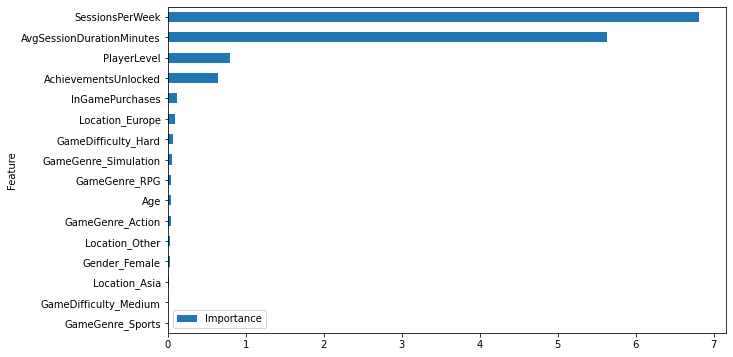

In [73]:
coefficients = logreg_intercept.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10,6))

<AxesSubplot:xlabel='SessionsPerWeek', ylabel='EngagementLevel_High'>

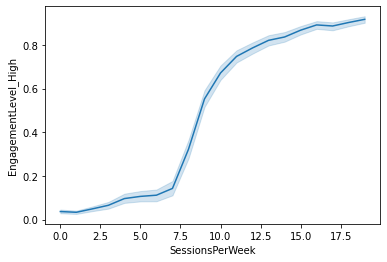

In [74]:
#line chart of sessiosn per week vs engagement level
sns.lineplot(data=gb, x='SessionsPerWeek', y='EngagementLevel_High')

<AxesSubplot:xlabel='AvgSessionDurationMinutes', ylabel='EngagementLevel_High'>

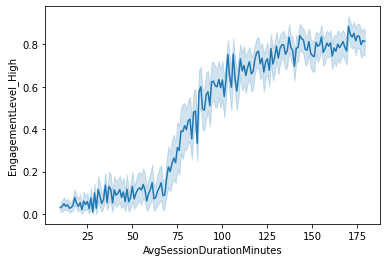

In [75]:
#Line chart of session duration vs. engagement level
sns.lineplot(data=gb, x='AvgSessionDurationMinutes', y='EngagementLevel_High')

<AxesSubplot:xlabel='PlayerLevel', ylabel='EngagementLevel_High'>

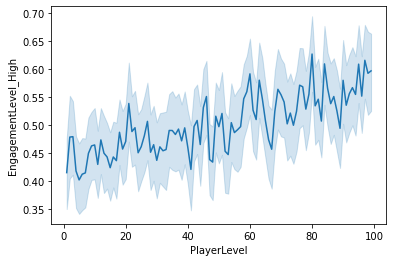

In [76]:
#Line chart of player level vs engagement level
sns.lineplot(data=gb, x='PlayerLevel', y='EngagementLevel_High')

<AxesSubplot:xlabel='AchievementsUnlocked', ylabel='EngagementLevel_High'>

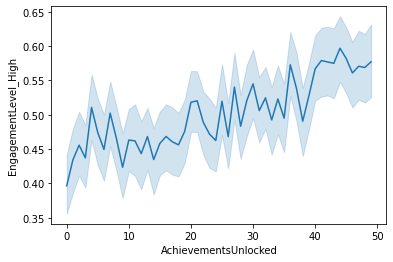

In [77]:
#line chart of achievements unlocked vs engagement level
sns.lineplot(data=gb, x='AchievementsUnlocked', y='EngagementLevel_High')

<AxesSubplot:xlabel='Gender_Female', ylabel='EngagementLevel_High'>

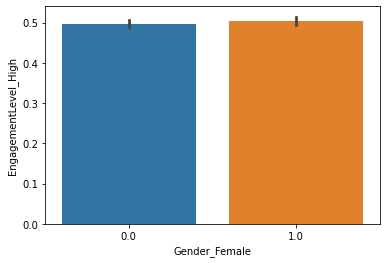

In [78]:
#bar graph showing the engagement level of females(1) vs. males (0)
sns.barplot(data=gb, x='Gender_Female', y='EngagementLevel_High')

<AxesSubplot:xlabel='Age', ylabel='EngagementLevel_High'>

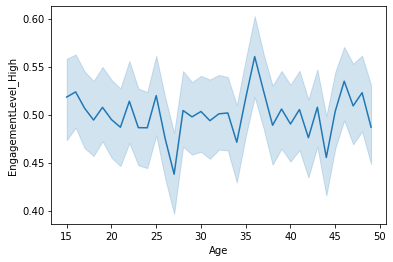

In [79]:
#line graph of age vs engagement level
sns.lineplot(data=gb, x='Age', y='EngagementLevel_High')

## Conclusions
<br>

- __Conclusion 1:__  When finding a model to predict high engagement gaming activity I found that the logistic regression model with an intercept was performing best at reducing the number of false negatives.
<br>

- __Conslusion 2:__  The most important features to my model for predicting high engagement gaming behavior are how many sessions per week they play and how long those sessions are. There is a steep increase in the proportion of high engagement gamers in people who play 9 or more sessions per week of at least 90 minutes. 
<br>

- __Conclusion 3:__   Age, gender, game difficulty, location, and game genre are not significant or important features in predicting high engagement gamers. 
<br>

## Next Steps/Limitations
<br>

- __Next Step 1:__  This model can be useful for predicting which people are more likely to be engaged in the video games you design or who to advertise to in order to have a higher chance of getting them to purchase your game.
<br> 

- __Next Step 2:__  Learn how to identify people based on how many sessions they play per week and how many minutes they spend playing in each session. 
<br> 

- __Next Step 3:__  Limitation: I tried to change the C parameter to 100 and ran it for an hour and fifteen minutes before it fit the model and it didn't change the results. Therefore, I'm going to remove this from the program so that if someone wants to run it it won't take that long.  I also ran C=10 and it took quite some time too and didn't make a difference with the metrics so I'm going to keep it at default. 